In [1]:
# Importing all the necessary liabraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [38]:
# Loading the Dataset

df = pd.read_csv('/content/amazon.csv')

Source URL: https://drive.google.com/file/d/1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB/view

Business Context: So my targeted Company as a client is "Amazon", a leading e-commerce company. The company has provided me with a dataset containing information on their various products, including pricing, ratings, and customer reviews. So, as a data scientist, my task is to analyze the data to provide insights that can help Amazon optimize their product offerings, pricing strategies, and customer satisfaction.

In [10]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [4]:
# Data Exploration

print("\nData Exploration:")
print(df.info())


Data Exploration:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null  

In [5]:
print(df.describe())

        product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999                 50%    4.1        

In [6]:
# Checking for any missing value
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [8]:
# Data Preprocessing
# Droping the rows with missing values
df.dropna(inplace=True)

In [ ]:
print(df[])

In [9]:
print(df.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [12]:
print(df[['discounted_price', 'actual_price']])

     discounted_price actual_price
0                ₹399       ₹1,099
1                ₹199         ₹349
2                ₹199       ₹1,899
3                ₹329         ₹699
4                ₹154         ₹399
...               ...          ...
1460             ₹379         ₹919
1461           ₹2,280       ₹3,045
1462           ₹2,219       ₹3,080
1463           ₹1,399       ₹1,890
1464           ₹2,863       ₹3,690

[1463 rows x 2 columns]


In [14]:
# Converting price columns to numeric
df['discounted_price'] = df['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹','').str.replace(',','').astype(float)


In [15]:
print(df[['discounted_price', 'actual_price']])

      discounted_price  actual_price
0                399.0        1099.0
1                199.0         349.0
2                199.0        1899.0
3                329.0         699.0
4                154.0         399.0
...                ...           ...
1460             379.0         919.0
1461            2280.0        3045.0
1462            2219.0        3080.0
1463            1399.0        1890.0
1464            2863.0        3690.0

[1463 rows x 2 columns]


In [16]:
print(df['discount_percentage'])

0       64%
1       43%
2       90%
3       53%
4       61%
       ... 
1460    59%
1461    25%
1462    28%
1463    26%
1464    22%
Name: discount_percentage, Length: 1463, dtype: object


In [17]:
# Converting discount_percentage to numeric
df['discount_percentage']= df['discount_percentage'].str.rstrip('%').astype(float)

In [18]:
print(df['discount_percentage'])

0       64.0
1       43.0
2       90.0
3       53.0
4       61.0
        ... 
1460    59.0
1461    25.0
1462    28.0
1463    26.0
1464    22.0
Name: discount_percentage, Length: 1463, dtype: float64


Explanatory Data Analysis(EDA)


Question 1: What are the top 5 product categories by average rating?

--> This analysis will help to identify the best- performing product categories, which can guide inventory and further marketing decisions.

In [23]:
# Converting rating to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

print("\n1. Top 5 Categories by Average Ratings:")

# Calculate the average rating per category and sort it in descending order
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_categories)


1. Top 5 Categories by Average Ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


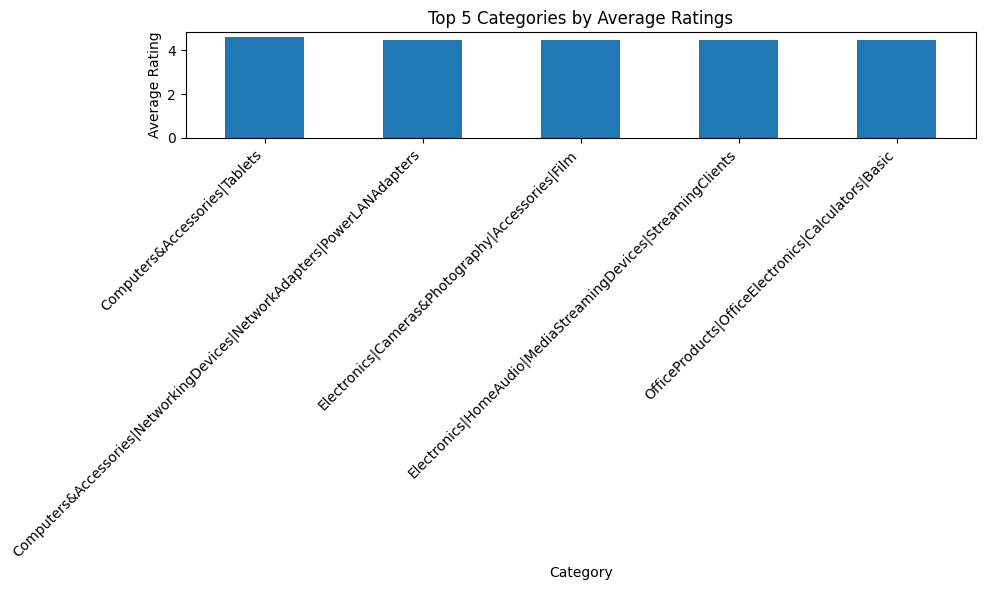

In [24]:
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.title('Top 5 Categories by Average Ratings')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Question 2: What is the replationship between discount percentage and rating?

--> This analysis will help determine if higher discounts lead to better ratings, informing pricing strategies.


2. Relationship between Discount Percentage and Rating:


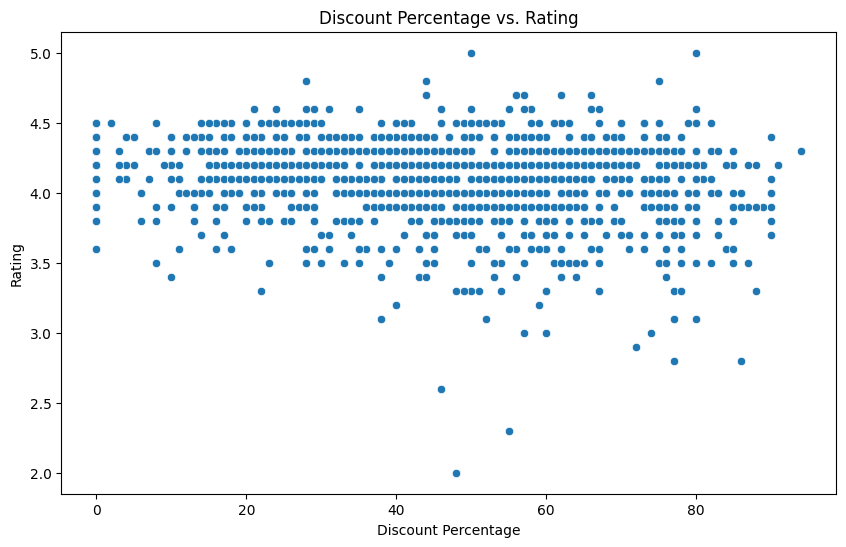

In [25]:
print("\n2. Relationship between Discount Percentage and Rating:")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discount_percentage', y='rating')
plt.title('Discount Percentage vs. Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()


In [26]:
correlation = df['discount_percentage'].corr(df['rating'])
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: -0.16


Question 3: What are the most common words in product names?

--> This analysis will reveal popular product features or trends, guiding product development and marketing efforts.

In [30]:
print("\n3. Most Common Words in Product Names:")

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Product Names')
    plt.show()


3. Most Common Words in Product Names:


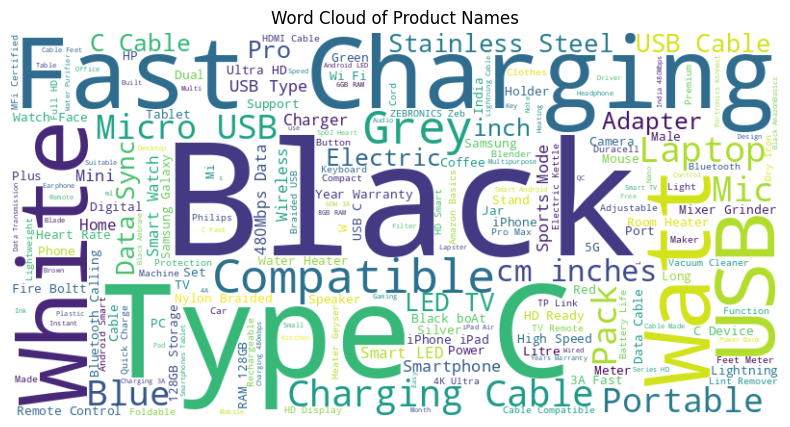

In [31]:
generate_wordcloud(' '.join(df['product_name']))

Queation 4: How does the average rating vary with the number of reviews?

--> This analysis will help understand if products with more reviews tend to have higher or lower ratings.

<ipython-input-33-214969f07e4c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_review_count = df.groupby('review_count_bin')['rating'].mean().sort_values(ascending=False)


review_count_bin
101-1k      4.006324
0-100       3.923611
1k-10k           NaN
10k-100k         NaN
100k+            NaN
Name: rating, dtype: float64


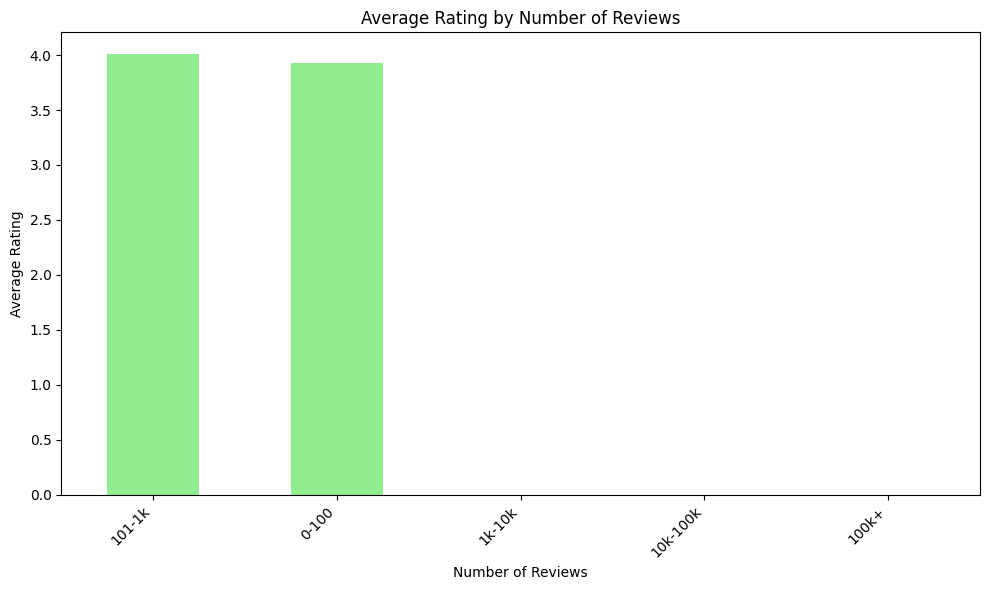

In [33]:
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Proceed with creating bins
df['review_count_bin'] = pd.cut(df['rating_count'], bins=[0, 100, 1000, 10000, 100000, float('inf')], labels=['0-100', '101-1k', '1k-10k', '10k-100k', '100k+'])

avg_rating_by_review_count = df.groupby('review_count_bin')['rating'].mean().sort_values(ascending=False)
print(avg_rating_by_review_count)

plt.figure(figsize=(10, 6))
avg_rating_by_review_count.plot(kind='bar', color='lightgreen')
plt.title('Average Rating by Number of Reviews')
plt.ylabel('Average Rating')
plt.xlabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Question 5: What is the distribution of discounts across different price ranges?

--> This analysis will help identify pricing strategies for different product price ranges


5. Distribution of Discounts Across Price Ranges:
price_range
501-1k    54.605016
5k-10k    51.931818
1k-5k     48.419569
0-500     40.577273
10k+      38.703704
Name: discount_percentage, dtype: float64


<ipython-input-36-55a752107d9e>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_by_price_range = df.groupby('price_range')['discount_percentage'].mean().sort_values(ascending=False)


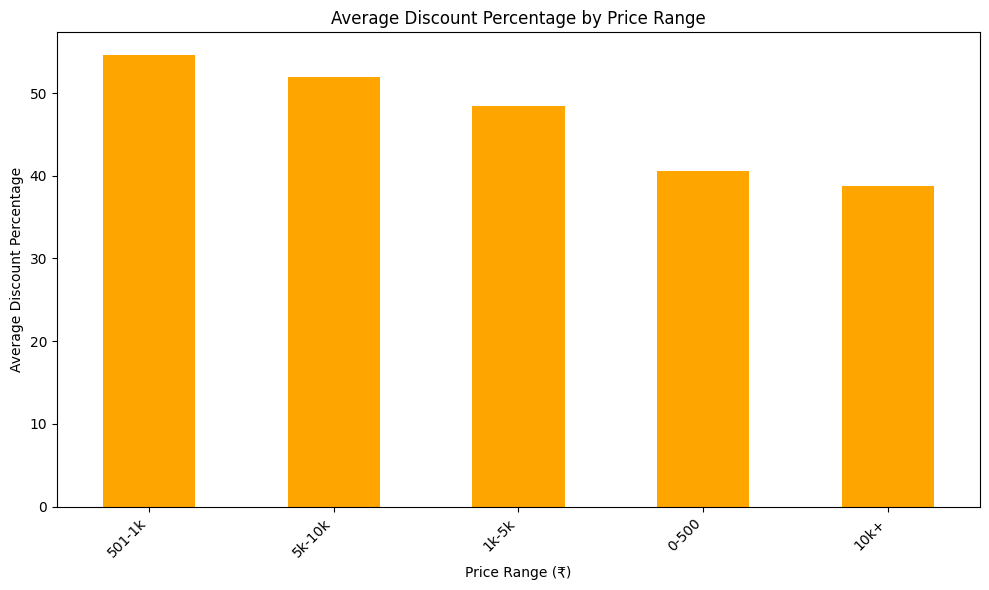

In [36]:
print("\n5. Distribution of Discounts Across Price Ranges:")
df['price_range'] = pd.cut(df['actual_price'], bins=[0, 500, 1000, 5000, 10000, float('inf')], labels=['0-500', '501-1k', '1k-5k', '5k-10k', '10k+'])

discount_by_price_range = df.groupby('price_range')['discount_percentage'].mean().sort_values(ascending=False)
print(discount_by_price_range)

plt.figure(figsize=(10, 6))
discount_by_price_range.plot(kind='bar', color='orange')
plt.title('Average Discount Percentage by Price Range')
plt.ylabel('Average Discount Percentage')
plt.xlabel('Price Range (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Final Discussion and Conclusions:

So, above analysis has provided valuable insights into Amazon's product offerings and customer behavior
1. We identified the top-performing product categories, which will guide inventory and marketing decisions.
2. The relationship between discounts and ratings was explored, informing pricing strategies.
3. Common words in product names were visualized, revealing popular features or trends.
4. We analyzed how ratings vary with the number of reviews, which can help in understanding product perception.
5. The distribution of discounts across price ranges was examined, aiding in pricing strategy optimization.

Limitations of this analysis include potential biases in customer reviews and ratings, and the snapshot nature of the data.

Recommendations:
1. Focus marketing efforts on top-rated categories to capitalize on their popularity.
2. Optimize discount strategies based on the observed relationship with ratings and price ranges.
3. Use insights from product name analysis to guide product development and marketing language.
4. Conider strategies to encourage more reviews for products with fewer ratings to improve overall perception.
5. Conduct further analysis on seasonal trends and competitor pricing to refine strategies.
